The Code

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv("spambase/spambase.data", header=None)

# Rename columns with attribute names
with open("spambase/spambase.names") as f:
    columns = []
    for line in f.readlines()[33:]:
        if line.startswith("word_freq"):
            name = line.split(":")[0]
            columns.append(name)
        elif line.startswith("char_freq"):
            name = line.split(":")[0]
            columns.append(name)
        elif line.startswith("capital_run"):
            name = line.split(":")[0]
            columns.append(name)
    columns.append("spam")
data.columns = columns

# Drop irrelevant features (capital_run_length_average, capital_run_length_longest)
data = data.drop(columns=["capital_run_length_average", "capital_run_length_longest"])

# check for missing values
if data.isna().any().any():
    print("Missing values found!")
    for col in data.columns[data.isna().any()]:
        print(f"Column {col} has {data[col].isna().sum()} missing value(s)")
        print(data[data[col].isna()])
else:
    print("No missing values found!")


# Transform categorical variables (there are none in this dataset)

# Scale numeric features
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# Save the preprocessed dataset
data.to_csv("preprocessed_spambase.csv", index=False)


# Split the data into features (X) and target variable (y)
X = data.drop('spam', axis=1)
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit KNN and Decision Tree models
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)


# Make predictions using both models
y_pred_knn = knn_model.predict(X_test)

y_pred_dt = dt_model.predict(X_test)


# Compute evaluation metrics for KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Compute evaluation metrics for Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)


# Compare the performance of both models based on the evaluation metrics and select the one with the optimal performance
print("Evaluation metrics for KNN model:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 score: {f1_knn}")
print(f"Confusion matrix:\n {confusion_matrix_knn}")

print("\nEvaluation metrics for Decision Tree model:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 score: {f1_dt}")
print(f"Confusion matrix:\n {confusion_matrix_dt}")


No missing values found!
Evaluation metrics for KNN model:
Accuracy: 0.8968512486427795
Precision: 0.9019073569482289
Recall: 0.8487179487179487
F1 score: 0.8745046235138706
Confusion matrix:
 [[495  36]
 [ 59 331]]

Evaluation metrics for Decision Tree model:
Accuracy: 0.9033659066232356
Precision: 0.936231884057971
Recall: 0.8282051282051283
F1 score: 0.8789115646258503
Confusion matrix:
 [[509  22]
 [ 67 323]]


Hyperparameter Tuning

In [10]:
# Perform hyperparameter tuning for KNN model
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_model_tuned = knn_grid.best_estimator_

# Perform hyperparameter tuning for Decision Tree model
dt_params = {'max_depth': [3, 5, 7, 9, 11]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt_model_tuned = dt_grid.best_estimator_

# Fit tuned models on training data
knn_model_tuned.fit(X_train, y_train)
dt_model_tuned.fit(X_train, y_train)

# Make predictions using tuned models
y_pred_knn_tuned = knn_model_tuned.predict(X_test)
y_pred_dt_tuned = dt_model_tuned.predict(X_test)

# Compute evaluation metrics for tuned models
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned)
confusion_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)

accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)
confusion_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)

# Compare the performance of tuned models based on evaluation metrics
print("\nEvaluation metrics for tuned KNN model:")
print(f"Accuracy: {accuracy_knn_tuned}")
print(f"Precision: {precision_knn_tuned}")
print(f"Recall: {recall_knn_tuned}")
print(f"F1 score: {f1_knn_tuned}")
print(f"Confusion matrix:\n {confusion_matrix_knn_tuned}")

print("\nEvaluation metrics for tuned Decision Tree model:")
print(f"Accuracy: {accuracy_dt_tuned}")
print(f"Precision: {precision_dt_tuned}")
print(f"Recall: {recall_dt_tuned}")
print(f"F1 score: {f1_dt_tuned}")
print(f"Confusion matrix:\n {confusion_matrix_dt_tuned}")



Evaluation metrics for tuned KNN model:
Accuracy: 0.8935939196525515
Precision: 0.9101123595505618
Recall: 0.8307692307692308
F1 score: 0.8686327077747991
Confusion matrix:
 [[499  32]
 [ 66 324]]

Evaluation metrics for tuned Decision Tree model:
Accuracy: 0.9261672095548317
Precision: 0.9327956989247311
Recall: 0.8897435897435897
F1 score: 0.9107611548556431
Confusion matrix:
 [[506  25]
 [ 43 347]]


Show and Print Confusion Matrix

In [74]:
import matplotlib.pyplot as plt
import numpy as np

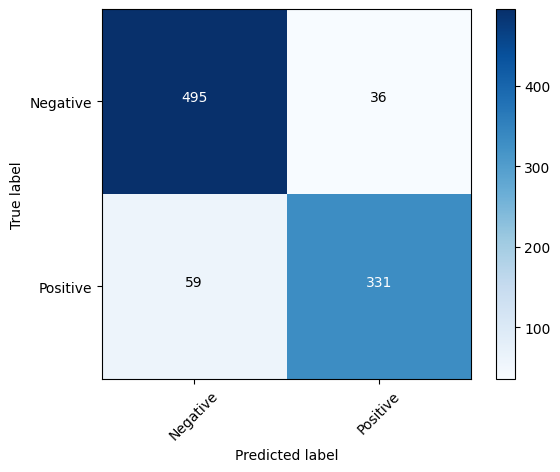

In [75]:
# Confusion matrix for KNN model
#confusion_matrix_knn = np.array([[495, 36], [59, 331]])
plt.imshow(confusion_matrix_knn, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.savefig("confusion_matrix_knn.png")

# add values to the confusion matrix
thresh = confusion_matrix_knn.max() / 2.
for i, j in itertools.product(range(confusion_matrix_knn.shape[0]), range(confusion_matrix_knn.shape[1])):
    plt.text(j, i, format(confusion_matrix_knn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_knn[i, j] > thresh else "black")

# save the confusion matrix as an image
plt.savefig('confusion_matrix_knn.png', dpi=300, bbox_inches='tight')

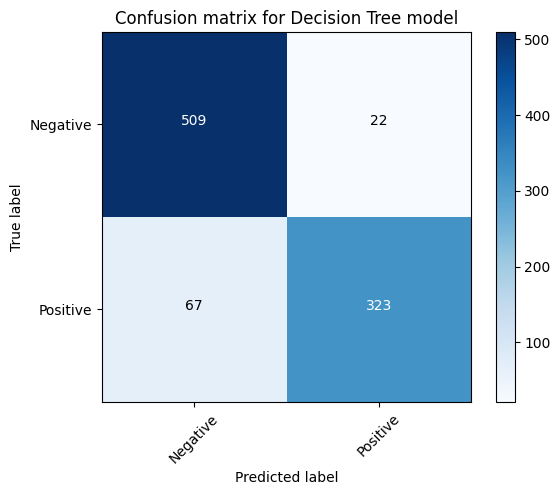

In [67]:
# Confusion matrix for Decision Tree model
#confusion_matrix_dt = np.array([[509, 22], [67, 323]])
plt.imshow(confusion_matrix_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix for Decision Tree model")
plt.savefig("confusion_matrix_dt.png")

# add values to the confusion matrix
thresh = confusion_matrix_dt.max() / 2.
for i, j in itertools.product(range(confusion_matrix_dt.shape[0]), range(confusion_matrix_dt.shape[1])):
    plt.text(j, i, format(confusion_matrix_dt[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_dt[i, j] > thresh else "black")

# save the confusion matrix as an image
plt.savefig('confusion_matrix_dt.png', dpi=300, bbox_inches='tight')

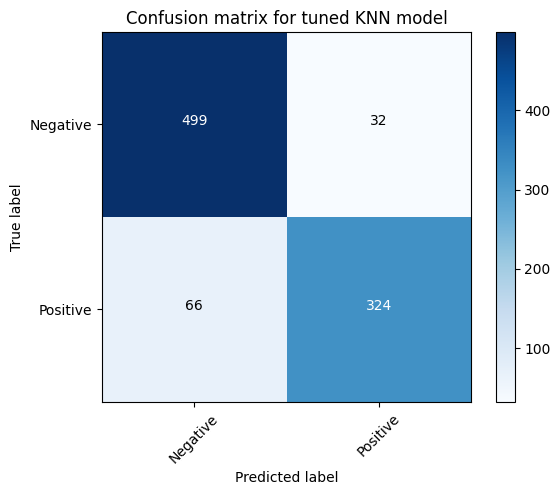

In [66]:
# Confusion matrix for tuned KNN model
#confusion_matrix_tuned_knn = np.array([[499, 32], [66, 324]])
plt.imshow(confusion_matrix_tuned_knn, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix for tuned KNN model")
plt.savefig("confusion_matrix_tuned_knn.png")

# add values to the confusion matrix
thresh = confusion_matrix_tuned_knn.max() / 2.
for i, j in itertools.product(range(confusion_matrix_tuned_knn.shape[0]), range(confusion_matrix_tuned_knn.shape[1])):
    plt.text(j, i, format(confusion_matrix_tuned_knn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_tuned_knn[i, j] > thresh else "black")

# save the confusion matrix as an image
plt.savefig('confusion_matrix_tuned_knn.png', dpi=300, bbox_inches='tight')

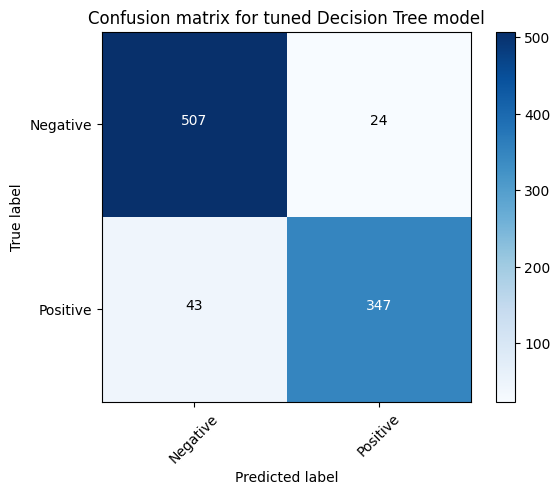

In [69]:
# Confusion matrix for tuned Decision Tree model
#confusion_matrix_tuned_dt = np.array([[507, 24], [43, 347]])
plt.imshow(confusion_matrix_tuned_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix for tuned Decision Tree model")
plt.savefig("confusion_matrix_tuned_dt.png")

# add values to the confusion matrix
thresh = confusion_matrix_tuned_dt.max() / 2.
for i, j in itertools.product(range(confusion_matrix_tuned_dt.shape[0]), range(confusion_matrix_tuned_dt.shape[1])):
    plt.text(j, i, format(confusion_matrix_tuned_dt[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix_tuned_dt[i, j] > thresh else "black")

# save the confusion matrix as an image
plt.savefig('confusion_matrix_tuned_dt.png', dpi=300, bbox_inches='tight')